## How to Add Notes

To add your own notes to this notebook:
1. **Create a new cell**: Click the `+` button in the toolbar, or press `B` (below) / `A` (above) in command mode.
2. **Change to Markdown**: Use the dropdown in the toolbar (change *Code* to *Markdown*), or press `M` in command mode.
3. **Write your notes** using Markdown syntax:
   - `# Heading` for titles
   - `**bold**` and `*italic*` for emphasis
   - `-` or `1.` for lists
   - `` `code` `` for inline code
4. **Render**: Press `Shift + Enter` to render the Markdown cell.

> **Example note below** - try editing it!


### My Notes

Key takeaways from this session:
- Jupyter runs code **cell-by-cell**, not top to bottom
- Always restart the kernel after deleting cells to avoid stale variables
- Use `pandas`, `numpy`, and `matplotlib` for data analysis


# Statistical Data Management Session 1: Visualisation of Qualitative Data

## Introduction to JupyterLab

1. Run the following cell of code. Look up the shortcut to run a cell via the Run menu.

In [28]:
print("Hello World!")

Hello World!


2. Delete the cell. Add it again. Delete it again using a shortcut, which you can find in the Edit menu.

3. Fix the bug in the following code.

In [29]:
a = 5
b = "10"
print(a+int(b))
print(a*int(b))

print("Or")

print(str(a)+str(b))
print(a*str(b) )

15
50
Or
510
1010101010


4. Run the following cell and then delete the cell.

In [30]:
c = 10

5. Now run the following cell.

In [31]:
print(c)

10


6. You get an output, despite the fact that the code defining the variable `c` has been deleted! This is because JupyterLab runs code cell-by-cell, not top to bottom. Click the round arrow button on top that says *Restart the kernel* and try running the cell again. It is wise to restart the kernel if you deleted code, so you don't rely on variables that have been defined by no-longer existing code.

7. Run the following cell twice and explain the behaviour.

In [32]:
print(c)
c = 50

10



## Reading Data from a CSV File

The packages we will be using are:
* `pandas`: a pandas *dataframe* is the main data structure we will use
* `numpy`: for calculations
* `matplotlib.pyplot`: for plotting

The line `%matplotlib inline` is to make plots appear below the cell.

Never change these imports and their aliases.

1. Run the following cell. The database file is in the *shared* folder. This data set contains the ids of voters for the new campus chair, and their respective preferred candidate.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_raw = pd.read_csv('../../shared/votes.csv', sep=";")
print(df_raw)

       id candidate
0    1000         A
1    1001         A
2    1002         B
3    1003         C
4    1004         A
..    ...       ...
154  1154         E
155  1155         D
156  1156         E
157  1157         D
158  1158         E

[159 rows x 2 columns]


2. We will not use this complete data set, but will count how many vote each candidate has and work with this data frame. Later we will see how we can perform this count with an SQL query, but for now we simply do this in `pandas`. Add a print to see the result. Use `df[<column_name>]` to access a certain column.

In [34]:
df = df_raw.groupby("candidate")["id"].count().reset_index(name="votes")
print(df)

  candidate  votes
0         A     49
1         B     35
2         C     20
3         D     31
4         E     24


> **df** here is a filter where you sort by candidate where you sort throught each voter id and count each candidate.

3. What does the following cell calculate? Give the variable a meaningful name and make sure to understand the syntax of the code.

In [35]:
df_a= df[df["candidate"]=="A"]["votes"] / df["votes"].sum()
print(df_a)

0    0.308176
Name: votes, dtype: float64


> **df_a** This is a faction of the total votes that candidate A received devided by the total votes. This is the percentage of votes that candidate A received.

4. You can add a column by simply defining `df[<new_column_name>] = <some calculation on a different column>`. Give the newly defined column below a meaningful name.

## Bar Plot

1. Look at the documentation of the bar plot method: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html. Two parameters are mandatory: `x` (categories to be plotted on the horizontal axis) and `height` (respective heights of the categories). Others are optional, recognisable by the fact that they are given a default value, which you can optionally overrule with a custom value. Once all options and plots have been defined, end with `plt.show()` and `plt.close()`, which makes the plot.

2. What does the following cell do? Now order candidates in descending order of number of votes. Look up the syntax online.

In [36]:
df = df.sort_values('candidate')
df = df.sort_values('votes')

3. Run the following cell. You are *not* required to be able to do this yourself, and we are not claiming this is an esthetically optimal plot, but we want to give you an idea of what is possible with this powerful library.

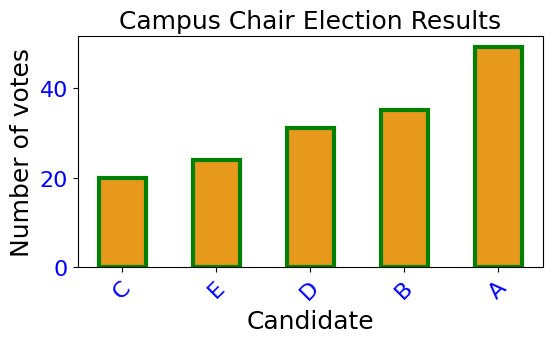

In [37]:
plt.figure(figsize=(6,3))
plt.xlabel('Candidate', fontsize=18)
plt.ylabel('Number of votes', fontsize=18)
plt.title('Campus Chair Election Results', fontsize=18)
plt.tick_params(labelsize=16, labelcolor='b')
plt.xticks(rotation=45)
plt.bar(df['candidate'],df['votes'], color=(0.9,0.6,0.1), width=0.5, edgecolor='g', linewidth=3)
plt.show()
plt.close()

> Here are some other custom ways to visualise the data. 

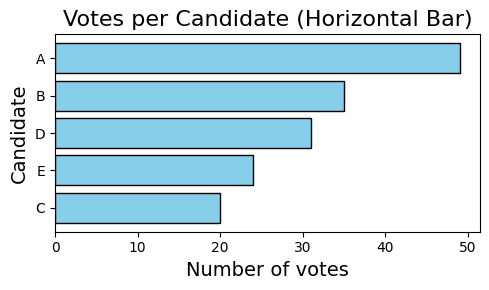

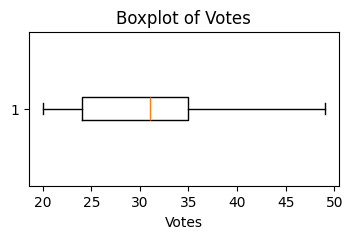

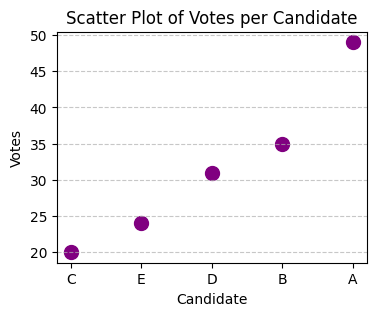

In [38]:
# Horizontal bar plot
plt.figure(figsize=(5,3))
plt.barh(df['candidate'], df['votes'], color='skyblue', edgecolor='black')
plt.xlabel('Number of votes', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.title('Votes per Candidate (Horizontal Bar)', fontsize=16)
plt.tight_layout()
plt.show()
plt.close()

# Boxplot (not very meaningful for this data, but for demonstration)
plt.figure(figsize=(4,2))
plt.boxplot(df['votes'], vert=False)
plt.xlabel('Votes')
plt.title('Boxplot of Votes')
plt.show()
plt.close()

# Scatter plot (for demonstration, candidate as x-ticks)
plt.figure(figsize=(4,3))
plt.scatter(df['candidate'], df['votes'], s=100, color='purple')
plt.xlabel('Candidate')
plt.ylabel('Votes')
plt.title('Scatter Plot of Votes per Candidate')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

## Pie Charts

1. Not all data are interesting to analyse the election results. What does the following cell achieve?

> You filter df to excluse all candidates with votes smaller than 20.

In [45]:
df_filtered = df[df['votes'] > 20]

2. Make a pie chart of these filtered data, starting from the documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html. Note that only the wedge sizes are mandatory, but it's a good idea to provide respective labels, to see which wedge corresponds to which candidate.

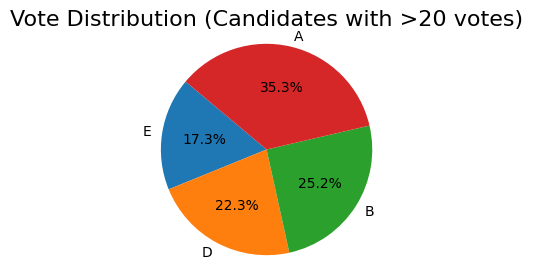

In [50]:
plt.figure(figsize=(3,3))
plt.pie(df_filtered['votes'], labels=df_filtered['candidate'], autopct='%1.1f%%', startangle=140)
plt.title('Vote Distribution (Candidates with >20 votes)', fontsize=16)
plt.axis('equal')
plt.show()
plt.close()



3. Run the following cell of code. Toy around with the parameters and variables to see what they mean or do (or look it up in the matplotlib API). Again, you are not required to be able to reproduce this plot.

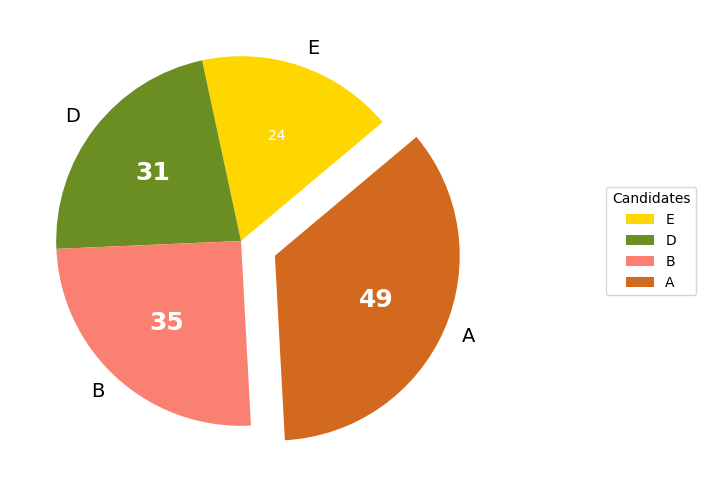

In [47]:
plt.figure(figsize=(6,6))

names_to_be_exploded = ["A"]
explosion =[0]*df_filtered.shape[0]
df_filtered.reset_index(drop=True, inplace=True)
indices_to_be_exploded = df_filtered[df_filtered['candidate'].isin(names_to_be_exploded)].index.values
for i in indices_to_be_exploded:
    explosion[i] = 0.2
    
total = df_filtered['votes'].sum()
colors = ['gold','olivedrab','salmon','chocolate']
# full list at: https://matplotlib.org/stable/gallery/color/named_colors.html
patches,texts,autotexts = plt.pie(df_filtered['votes'], labels=df_filtered['candidate'], colors=colors, explode=explosion, startangle=40, autopct = lambda p: '{:.0f}'.format(p * total / 100))
plt.setp(autotexts, color='white')
plt.setp(texts, size=14)
threshold = 30

for label in autotexts:
    if int(label.get_text())>threshold:
        label.set_fontsize(18)
        label.set_fontweight('bold')

plt.legend(title='Candidates',loc='right', bbox_to_anchor = [1.5,0.5])

plt.show()
plt.close()